# Prepare a PDF for BERTopic Analysis

BERTopic ingest a list of documents for NLP analysis.  However 'documents' in this context are text chunks, not full length documents or PDFs.  Therefore to use BERTopic on a PDF, we first need to ingest the PDF to generate this list of BERTopic documents.  One common technique is to use the 'block' function from the PyMuPDF pacakge to generate a list of text 'blocks' from a PDF.  These 'blocks' roughly correspond to paragraphs.  

Once the PDF is loaded, the 'pdf_into_data_dict' function from the local 'cleaning.py' file goes through the following steps to read in a pdf document and return a data dictionary holding the extracted text and images by block (roughly paragraph.)  

Steps in 'pdf_into_data_dict':
1. Read pdf into PyMuPDF object
2. load pages into block dict
3. Extract text data page and block
4. Extract image data by page and block
5. Return a 'data' dictionary with the keys: 'filepath', 'text' and 'images'.


## Step 1. Load necessary libraries

In this notebook we will use the pandas package for dataframe management, the custom functions from the local cleaning module, and the ipywidgets package for user interactivity.

In [1]:
import pandas as pd
from cleaning import *

import ipywidgets as widgets
from ipywidgets import Layout, Textarea

## Step 2. Load local pdf file
To use this notebook, store a pdf in the same directory as the notebook, and add that name in the 'Enter Local Filename' box below.

Example pdf stored in the directory: 
Soroudi and Amraee - 2013 - Decision making under uncertainty in energy system.pdf

In [2]:
local_filename = widgets.Text( description='Enter Local Filename:', style={'description_width': 'initial'}, layout=Layout(width='70%'))
local_filename

Text(value='', description='Enter Local Filename:', layout=Layout(width='70%'), style=TextStyle(description_wi…

## Step 3. Read in pdf using pdf_into_data_dict

In [3]:
pdf_data = pdf_into_data_dict(local_filename.value)

## Step 4. Save dataframes 
Dataframes can be easily stored for future use by [saving as feather files using pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_feather.html).  

The code for this is as follows:

### Save Feather File
```
dataframe.to_feather("path/to/file.feather")
```

### Read Feather File
```
pd.read_feather("path/to/file.feather")
```

## Step 5. Review Outputs

### Check output

In [7]:
type(pdf_data)

dict

In [8]:
pdf_data.keys()

dict_keys(['filepath', 'text', 'images'])

In [9]:
pdf_data['filepath']

'Soroudi and Amraee - 2013 - Decision making under uncertainty in energy system.pdf'

### Text data
Dataframe of text data.

In [10]:
text_dataframe = pd.DataFrame(pdf_data['text'])
text_dataframe.head(2)

,Page,Block,Text
0,1,2,Decision making under uncertainty in energy sy...
1,1,3,"Alireza Soroudi a,n, Turaj Amraee b"


### Images data
Dataframe of image data.

In [11]:
images_dataframe = pd.DataFrame(pdf_data['images'])
images_dataframe.head(2)

,number,type,bbox,width,height,ext,colorspace,xres,yres,bpc,transform,size,image,page
0,0,1,"(32.712005615234375, 60.832000732421875, 92.23...",248,272,jpeg,3,96,96,8,"(59.52000427246094, 0.0, -0.0, 65.220001220703...",46765,b'\xff\xd8\xff\xee\x00\x0eAdobe\x00d\x80\x00\x...,1
1,1,1,"(496.1199951171875, 54.99201965332031, 552.760...",236,298,jpeg,3,96,96,8,"(56.63999938964844, 0.0, -0.0, 71.520004272460...",33114,b'\xff\xd8\xff\xee\x00\x0eAdobe\x00d\x80\x00\x...,1


## Display image
The images are stored in the dataframe as byte objects.  The following code using hte PIL package will allow you to visualize these images within the notebook.

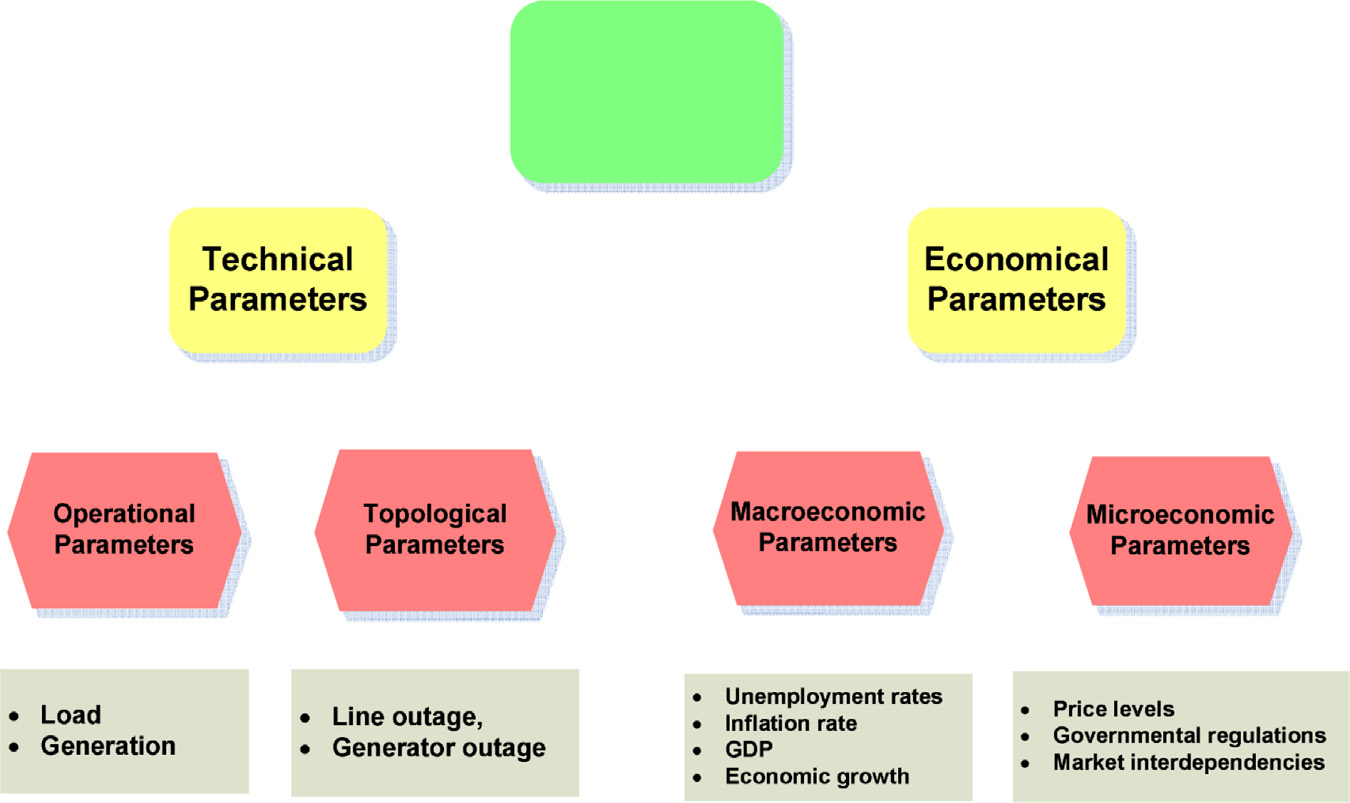

In [12]:
from PIL import Image
import io

image_example = images_dataframe.iloc[3]['image']
image = Image.open(io.BytesIO(image_example))
image.show()